# Quantum Paradox

#### General Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit as q
from qiskit import Aer 
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    plot_bloch_multivector,
    plot_histogram,array_to_latex
)
from IPython.display import display as disp

#### Required Simulators 

In [2]:
sv_sim = Aer.get_backend('statevector_simulator')
qasm_sim = Aer.get_backend('qasm_simulator')
# aer_sim = Aer.get_backend('aer_simulator')
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()


## 1. Schordinger's Cat

**Problem :** In a Closed box a cat and an radio active atom placed with a hammar such a way so that if atoms deckey hammer broke the the poison block and cat will die.
Until a observer open the box the state of the cat is in superposition between Dead and alive 


#### Define Atom as Qubit


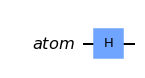

In [3]:
qr_atom = q.QuantumRegister(1,name = 'atom')
qc = q.QuantumCircuit(qr_atom)
qc.h(qr_atom[0])
disp(qc.draw('mpl'))
qc.measure_all()

In [4]:
result = aer_sim.run(qc,shots = 300).result()
result.get_counts()

{'0': 151, '1': 149}

#### Introducing Cat Qubit

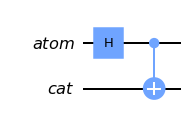

<IPython.core.display.Latex object>

In [5]:
qr_cat = q.QuantumRegister(1,name='cat')
qc=q.QuantumCircuit(qr_atom,qr_cat)
qc.h(qr_atom[0])
qc.cx(qr_atom[0],qr_cat[0])
disp(qc.draw('mpl'))
sv = sv_sim.run(qc).result().get_statevector()
disp(sv.draw('latex'))

#### Observers's point of view 

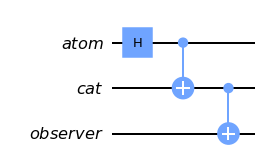

<IPython.core.display.Latex object>

In [6]:
qr_observer = q.QuantumRegister(1,'observer')
# qc = q.QuantumCircuit(qr_atom,qr_cat,
qc.add_register(qr_observer)
qc.cx(qr_cat[0],qr_observer[0])
disp(qc.draw('mpl'))
sv = sv_sim.run(qc).result().get_statevector()
disp(sv.draw('latex'))

In [7]:
qc.measure_all()

In [8]:
sv_sim.run(qc).result().get_counts()

{'111': 1}

## 2. Wigner's friend paradox : Measurement Problem  

**Problem :**

#### Wigner's Circuit 

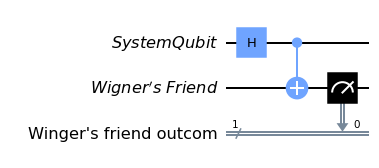

In [9]:
system_bit = q.QuantumRegister(1,name='SystemQubit')
wigners_friend = q.QuantumRegister(1,name='Wigner\'s Friend')
classical_register = q.ClassicalRegister(1,name='Winger\'s friend outcom')
qc = q.QuantumCircuit(system_bit,wigners_friend,classical_register)
qc.h(system_bit[0])
qc.cx(system_bit[0],wigners_friend[0])
qc.measure(wigners_friend[0],classical_register[0])
disp(qc.draw('mpl'))

<IPython.core.display.Latex object>

Wigner's Friend's Outcome : {'1': 514, '0': 510}


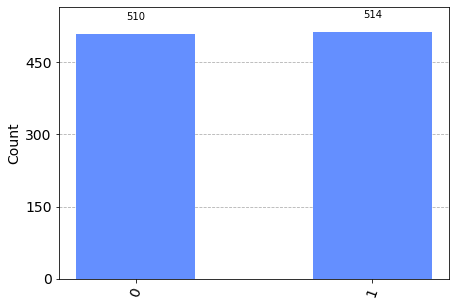

In [10]:
counts = aer_sim.run(qc).result().get_counts()
sv =sv_sim.run(qc).result().get_statevector()
disp(sv.draw('latex'))
print(f"Wigner's Friend's Outcome : {counts}")
disp(plot_histogram(counts))

## 3. Testing of Collaps:Irreversible Quantum Measurement 

In [11]:
qr_qubit = q.QuantumRegister(1,name='Qubit')
qr_observer = q.QuantumRegister(1,name='Observer')
qr_record = q.QuantumRegister(1,name= 'Record')
qc = q.QuantumCircuit(qr_qubit,qr_observer,qr_record)
qc.h(qr_qubit) 